In [63]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np


class CreationalPatternName:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def get_subsample(self, df_share):
#         <YOUR CODE HERE>
        """
        1. Copy train dataset
        2. Shuffle data (don't miss the connection between X_train and y_train)
        3. Return df_share %-subsample of X_train and y_train
        """
        _, X_sample, _, y_sample = train_test_split(self.X_train, self.y_train, test_size=df_share, shuffle=True)
        return X_sample, y_sample

    
if __name__ == "__main__":
#     <YOUR CODE HERE>
    """
    1. Load iris dataset
    2. Shuffle data and divide into train / test.
    """
    dataset = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, shuffle=True)
    
    # Preprocess:
    mean_ = np.mean(X_train, axis=0)
    std_ = np.max(X_train, axis=0)
    X_test = (X_test - mean_) / std_

    pattern_item = CreationalPatternName(X_train, y_train)
    df_shares = []
    scores = []
    for df_share in range(10, 101, 10):
        curr_X_train, curr_y_train = pattern_item.get_subsample(df_share)
#         <YOUR CODE HERE>
        """
        1. Preprocess curr_X_train, curr_y_train in the way you want
        2. Train Linear Regression on the subsample
        3. Save or print the score to check how df_share affects the quality
        """
        curr_X_train = (curr_X_train - mean_) / std_
        
        del clf
        clf = LogisticRegression()
        clf.fit(curr_X_train, curr_y_train)
        
        df_shares += [df_share]
        scores += [clf.score(X_test, y_test)]

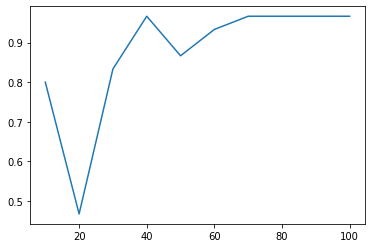

In [64]:
import matplotlib.pyplot as plt

plt.plot(df_shares, scores)